In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SensorAnalysis/HealthApp_2k.log_structured.csv')
templates = pd.read_csv('/content/drive/MyDrive/SensorAnalysis/HealthApp_2k.log_templates.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [4]:
df = df.drop('Pid', axis = 1)
df.head()

,LineId,Time,Component,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,flush sensor data,E12,flush sensor data


<ipython-input-5-6416114ee044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')
<ipython-input-5-6416114ee044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Steps'] = df_e22['Content'].str.extract(r'##(\d+)##')
<ipython-input-5-6416114ee044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

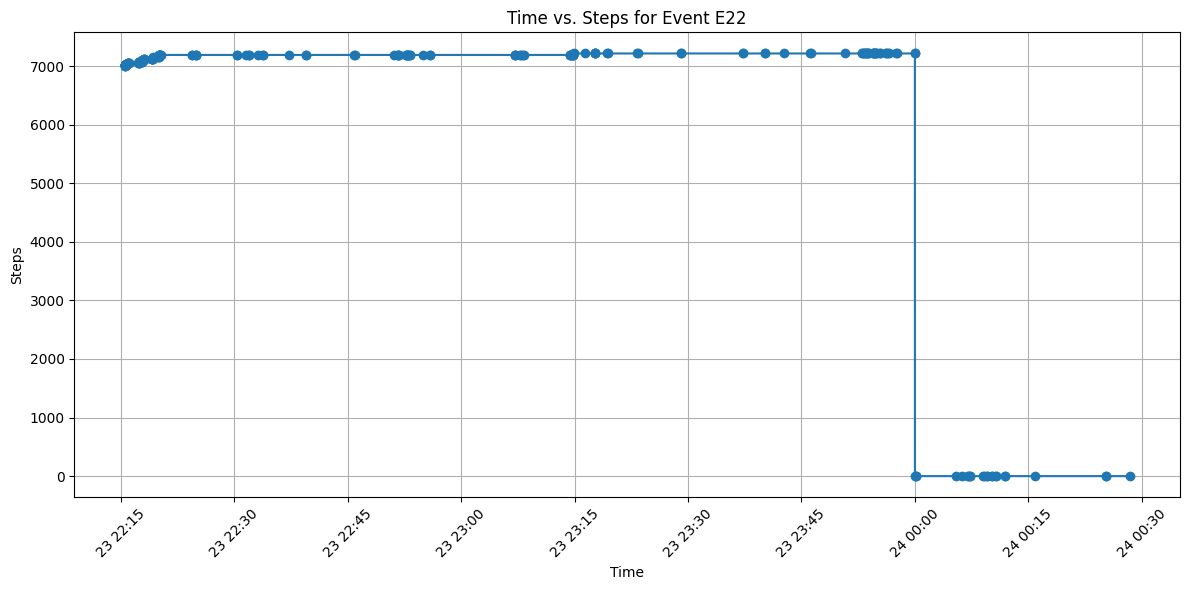

In [5]:
df_e22 = df[df['EventId'] == 'E22']
df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')
df_e22['Steps'] = df_e22['Content'].str.extract(r'##(\d+)##')
df_e22['Steps'] = df_e22['Steps'].astype(int)
plt.figure(figsize=(12, 6))
plt.plot(df_e22['Time'], df_e22['Steps'], marker='o', linestyle='-')
plt.title('Time vs. Steps for Event E22')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df_e22.head()

,LineId,Time,Component,Content,EventId,EventTemplate,Steps
5,6,2017-12-23 22:15:29.635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,6993
15,16,2017-12-23 22:15:29.950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7007
22,23,2017-12-23 22:15:30.632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7008
29,30,2017-12-23 22:15:31.142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7009
36,37,2017-12-23 22:15:32.145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7011


<ipython-input-19-2bfdacfad353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')
<ipython-input-19-2bfdacfad353>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Date'] = df_e22['Time'].dt.date


            Date  Steps
5     2017-12-23   6993
15    2017-12-23   7007
22    2017-12-23   7008
29    2017-12-23   7009
36    2017-12-23   7011
...          ...    ...
1925  2017-12-24      0
1935  2017-12-24      0
1951  2017-12-24      0
1957  2017-12-24      0
1966  2017-12-24      0

[242 rows x 2 columns]


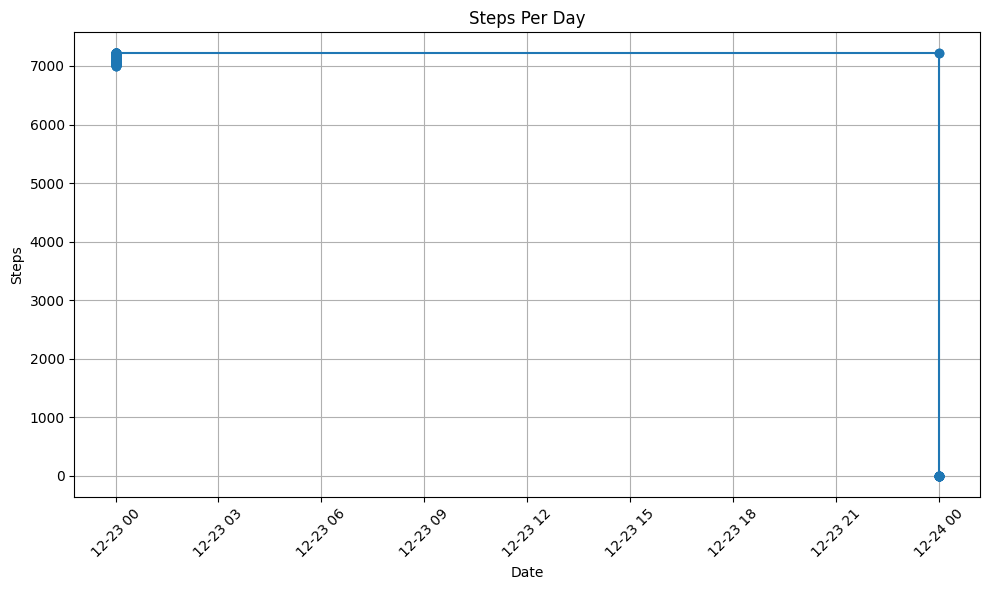

In [19]:
df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')

df_e22['Date'] = df_e22['Time'].dt.date

print(df_e22[['Date', 'Steps']])

plt.figure(figsize=(10, 6))
plt.plot(df_e22['Date'], df_e22['Steps'], marker='o')
plt.title('Steps Per Day')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
df_e22

,LineId,Time,Component,Content,EventId,EventTemplate,Steps,Date,Hour,Minute
5,6,2017-12-23 22:15:29.635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,6993,2017-12-23,22,15
15,16,2017-12-23 22:15:29.950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7007,2017-12-23,22,15
22,23,2017-12-23 22:15:30.632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7008,2017-12-23,22,15
29,30,2017-12-23 22:15:31.142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7009,2017-12-23,22,15
36,37,2017-12-23 22:15:32.145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7011,2017-12-23,22,15
...,...,...,...,...,...,...,...,...,...,...
1925,1926,2017-12-24 00:11:57.442,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24,0,11
1935,1936,2017-12-24 00:15:53.285,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24,0,15
1951,1952,2017-12-24 00:25:16.438,Step_SPUtils,getTodayTotalDetailSteps = 1514045640000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24,0,25
1957,1958,2017-12-24 00:25:17.438,Step_SPUtils,getTodayTotalDetailSteps = 1514046240000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24,0,25


In [35]:
df_e22['Date'] = df_e22['Time'].dt.date
df_e22['Hour'] = df_e22['Time'].dt.hour
df_e22['Minute'] = df_e22['Time'].dt.minute

steps_increase_threshold = 1000
min_duration_minutes = 30

workout_sessions = []
current_session = None

for index, row in df_e22.iterrows():
    if row['Steps'] > steps_increase_threshold:
        if current_session is None:
            current_session = {'start_time': row['Time']}
        else:
            current_session['end_time'] = row['Time']
    else:
        if current_session is not None:
            duration = (current_session['end_time'] - current_session['start_time']).total_seconds() / 60
            if duration >= min_duration_minutes:
                workout_sessions.append(current_session)
            current_session = None

if workout_sessions:
    print("Workout sessions:")
    for session in workout_sessions:
        print(f"Start: {session['start_time']} - End: {session['end_time']}")

Workout sessions:
Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000


<ipython-input-35-ed7fd5f30dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Date'] = df_e22['Time'].dt.date
<ipython-input-35-ed7fd5f30dda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e22['Hour'] = df_e22['Time'].dt.hour
<ipython-input-35-ed7fd5f30dda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [43]:
df_e4 = df[df['EventId'] == 'E4']
df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)')
df_e4['Calories'] = df_e4['Calories'].astype(int)
df_e4.head()

<ipython-input-43-1313b38fa57d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e4['Calories'] = df_e4['Content'].str.extract(r'(\d+)')
<ipython-input-43-1313b38fa57d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e4['Calories'] = df_e4['Calories'].astype(int)


,LineId,Time,Component,Content,EventId,EventTemplate,Date,Hour,Minute,Calories
8,9,2017-12-23 22:15:29.645,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,126775
17,18,2017-12-23 22:15:29.959,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,126797
24,25,2017-12-23 22:15:30.639,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,126818
31,32,2017-12-23 22:15:31.157,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,126861
38,39,2017-12-23 22:15:32.156,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,126882


<ipython-input-44-4ebefb07f2b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e4['Time'] = pd.to_datetime(df_e4['Time'])


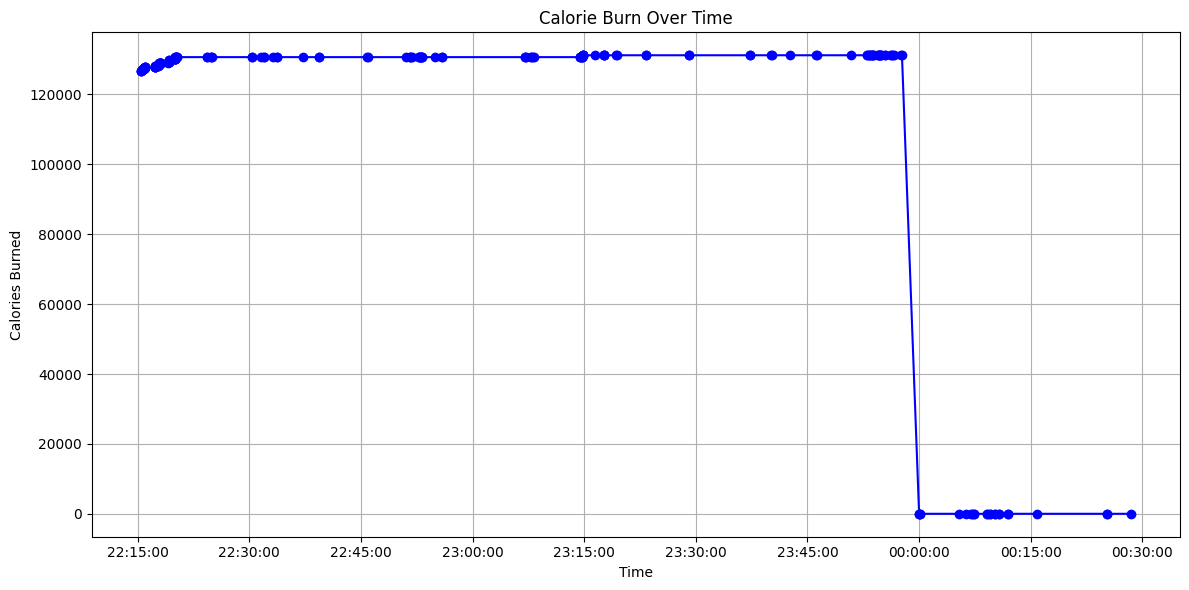

In [44]:
df_e4['Time'] = pd.to_datetime(df_e4['Time'])

plt.figure(figsize=(12, 6))
plt.plot(df_e4['Time'], df_e4['Calories'], marker='o', linestyle='-', color='b')
plt.title('Calorie Burn Over Time')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

plt.show()

#Conclusions
##Steps Counter
From the given observations app loads detailed steps data when event E22 occures.
On further analysis (refer to cell 3) the following can be concluded:
* on 23-12-2017(from 10:15PM to 23:57PM) person's total step count = 7214
* on 24-12-2017(from 00:00AM to 00:29AM) person's total step count = 0
* Person's average number of steps per day = 23898 (approx)
* Workout sessions (Refer to cell 4): Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000
* On 23-12-2017 after 11:14PM there is no change in steps or there isn't any movements so the person might be resting or put their phone on rest

##Calorie Counter
From the given observations app loads detailed calorie data when event E4 occures.
On further analysis (refer to cell 7, 8) the following can be concluded:
* on 23-12-2017(from 10:15PM to 23:57PM) person's total(cumulative) calories = 131208
* on 24-12-2017(from 00:00AM to 00:29AM) person's total calories = 0

##Confirmations
* On 23-12-2017 there is no any major change in steps and calories from 11:14 PM, this confirms that person is resting or put thier phone on rest